In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import wrangle
import env
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import importlib
import wrangle
importlib.reload(wrangle)

<module 'wrangle' from '/Users/tux/codeup-data-science/regression-exercises/wrangle.py'>

In [ ]:
df = wrangle.get_zillow_data()

In [ ]:
df

In [6]:
def summarize_data(df):
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary = summary.reset_index()
    summary['column_name'] = summary['index']
    summary = summary[['column_name', 'dtypes']]
    summary['missing_values'] = df.isnull().sum().values
    summary['unique_values'] = df.nunique().values
    summary['count'] = df.count().values
    summary['mean'] = df.mean().values
    summary['std'] = df.std().values
    summary['min'] = df.min().values
    summary['25%'] = df.quantile(0.25).values
    summary['50%'] = df.quantile(0.5).values
    summary['75%'] = df.quantile(0.75).values
    summary['max'] = df.max().values
    return summary

In [7]:
summarize_data(df)

column_name   dtypes  missing_values  unique_values    count  \
0             num_bedrooms  float64               0             25  2935546   
1            num_bathrooms  float64               0             39  2935546   
2               total_sqft    int64               0          12596  2935546   
3  assessed_property_value  float64               0         647043  2935546   
4               year_built    int64               0            183  2935546   
5       total_property_tax  float64               0        1040234  2935546   
6                   county    int64               0              3  2935546   

            mean            std     min          25%        50%        75%  \
0       3.138408       1.222246     0.0       2.0000       3.00       4.00   
1       2.248627       1.051303     0.0       2.0000       2.00       3.00   
2    1830.435929    1941.114289     1.0    1214.0000    1574.00    2139.00   
3  440376.977558  729724.272031     0.0  188280.0000  321186.50  513849.00   
4    1964.432995      23.644403  1801.0    1950.0000    1963.00    1981.00   
5    5396.500079    8707.647341     0.0    2489.0125    4020.74    6238.74   
6    6047.879487      20.168735  6037.0    6037.0000    6037.00    6059.00   

            max  
0  2.500000e+01  
1  3.200000e+01  
2  9.525760e+05  
3  2.870985e+08  
4  2.016000e+03  
5  3.458861e+06  
6  6.111000e+03

In [4]:
df = wrangle.wrangle_zillow_data()

In [5]:
df

num_bedrooms  num_bathrooms  total_sqft  assessed_property_value  \
2                 0.0            0.0       73026                1434941.0   
3                 0.0            0.0        5068                1174475.0   
4                 0.0            0.0        1776                 440101.0   
5                 0.0            0.0        2400                 287634.0   
7                 0.0            0.0        3611                 698984.0   
...               ...            ...         ...                      ...   
2982279           8.0            6.0        4582                 800000.0   
2982280           2.0            1.0         798                 469300.0   
2982281           3.0            3.0        1526                 594022.0   
2982282           4.0            4.0        2110                 554009.0   
2982283           1.0            1.0        1040                 620284.0   

         year_built  total_property_tax  county  
2              1959            20800.37    6037  
3              1948            14557.57    6037  
4              1947             5725.17    6037  
5              1943             3661.28    6037  
7              1946             7857.84    6037  
...             ...                 ...     ...  
2982279        2012                0.00    6037  
2982280        2006             5764.45    6037  
2982281        2014             7343.47    6037  
2982282        2014             6761.20    6037  
2982283        1910             7611.91    6037  

[2935546 rows x 7 columns]

In [8]:
df = wrangle.remove_outliers_iqr(df, multiplier=1.5)

In [9]:
df

num_bedrooms  num_bathrooms  total_sqft  assessed_property_value  \
10                4.0            4.0        3095                 192544.0   
30                2.0            2.0        1090                 357568.0   
33                3.0            2.0        2077                 646760.0   
45                4.0            2.0        1931                 224617.0   
46                0.0            1.0         700                 387288.0   
...               ...            ...         ...                      ...   
2982278           3.0            2.5        1648                 538640.0   
2982280           2.0            1.0         798                 469300.0   
2982281           3.0            3.0        1526                 594022.0   
2982282           4.0            4.0        2110                 554009.0   
2982283           1.0            1.0        1040                 620284.0   

         year_built  total_property_tax  county  
10             2016             2460.72    6037  
30             2004             6165.36    6037  
33             1926             7924.68    6037  
45             1957             2885.93    6037  
46             2008             4920.64    6037  
...             ...                 ...     ...  
2982278        2014             6370.58    6059  
2982280        2006             5764.45    6037  
2982281        2014             7343.47    6037  
2982282        2014             6761.20    6037  
2982283        1910             7611.91    6037  

[2333865 rows x 7 columns]

In [10]:
summarize_data(df)

column_name   dtypes  missing_values  unique_values    count  \
0             num_bedrooms  float64               0              8  2333865   
1            num_bathrooms  float64               0             10  2333865   
2               total_sqft    int64               0           3161  2333865   
3  assessed_property_value  float64               0         473602  2333865   
4               year_built    int64               0            112  2333865   
5       total_property_tax  float64               0         761704  2333865   
6                   county    int64               0              2  2333865   

            mean            std     min        25%       50%        75%  \
0       3.051643       0.966603     0.0       2.00       3.0       4.00   
1       2.103261       0.737799     0.5       2.00       2.0       3.00   
2    1584.051947     564.776968     1.0    1170.00    1484.0    1909.00   
3  322066.757906  190492.692147     0.0  176039.00  291445.0  440101.00   
4    1962.456885      22.436972  1905.0    1950.00    1961.0    1979.00   
5    4029.068318    2186.006180     0.0    2366.09    3699.3    5403.64   
6    6042.816141       9.701940  6037.0    6037.00    6037.0    6059.00   

         max  
0       7.00  
1       4.50  
2    3345.00  
3  914925.00  
4    2016.00  
5   10141.73  
6    6059.00

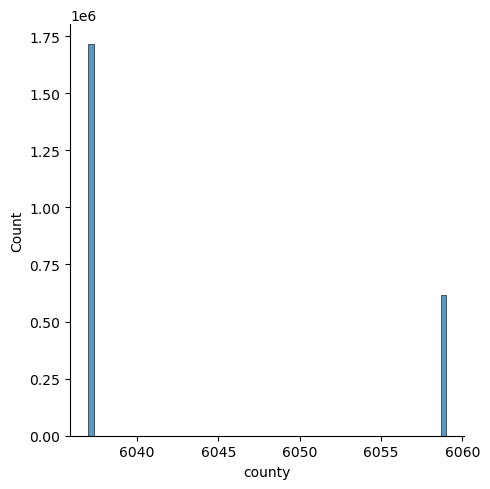

In [11]:
import seaborn as sns
sns.displot(x='county', data=df)

plt.show()

In [12]:
def scale_data(df):
    # Create an instance of MinMaxScaler
    scaler = MinMaxScaler()

    # Fit the scaler to the 'county' column
    scaler.fit(df[['county']])

    # Transform the 'county' column using the fitted scaler
    df['county'] = scaler.transform(df[['county']])
    return df

In [13]:
df

num_bedrooms  num_bathrooms  total_sqft  assessed_property_value  \
10                4.0            4.0        3095                 192544.0   
30                2.0            2.0        1090                 357568.0   
33                3.0            2.0        2077                 646760.0   
45                4.0            2.0        1931                 224617.0   
46                0.0            1.0         700                 387288.0   
...               ...            ...         ...                      ...   
2982278           3.0            2.5        1648                 538640.0   
2982280           2.0            1.0         798                 469300.0   
2982281           3.0            3.0        1526                 594022.0   
2982282           4.0            4.0        2110                 554009.0   
2982283           1.0            1.0        1040                 620284.0   

         year_built  total_property_tax  county  
10             2016             2460.72    6037  
30             2004             6165.36    6037  
33             1926             7924.68    6037  
45             1957             2885.93    6037  
46             2008             4920.64    6037  
...             ...                 ...     ...  
2982278        2014             6370.58    6059  
2982280        2006             5764.45    6037  
2982281        2014             7343.47    6037  
2982282        2014             6761.20    6037  
2982283        1910             7611.91    6037  

[2333865 rows x 7 columns]

In [14]:
wrangle.scale_data(df)

num_bedrooms  num_bathrooms  total_sqft  assessed_property_value  \
10                4.0            4.0        3095                 192544.0   
30                2.0            2.0        1090                 357568.0   
33                3.0            2.0        2077                 646760.0   
45                4.0            2.0        1931                 224617.0   
46                0.0            1.0         700                 387288.0   
...               ...            ...         ...                      ...   
2982278           3.0            2.5        1648                 538640.0   
2982280           2.0            1.0         798                 469300.0   
2982281           3.0            3.0        1526                 594022.0   
2982282           4.0            4.0        2110                 554009.0   
2982283           1.0            1.0        1040                 620284.0   

         year_built  total_property_tax  county  county_scaled  
10             2016             2460.72    6037            0.0  
30             2004             6165.36    6037            0.0  
33             1926             7924.68    6037            0.0  
45             1957             2885.93    6037            0.0  
46             2008             4920.64    6037            0.0  
...             ...                 ...     ...            ...  
2982278        2014             6370.58    6059            1.0  
2982280        2006             5764.45    6037            0.0  
2982281        2014             7343.47    6037            0.0  
2982282        2014             6761.20    6037            0.0  
2982283        1910             7611.91    6037            0.0  

[2333865 rows x 8 columns]

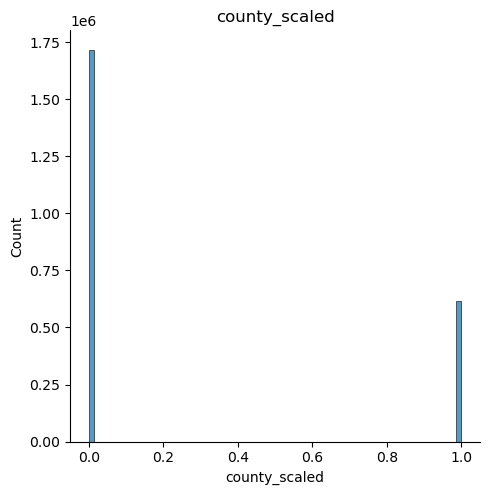

In [16]:
import seaborn as sns
sns.displot(x='county_scaled', data=df)

plt.title('county_scaled')
plt.show()

In [17]:
summarize_data(df)

column_name   dtypes  missing_values  unique_values    count  \
0             num_bedrooms  float64               0              8  2333865   
1            num_bathrooms  float64               0             10  2333865   
2               total_sqft    int64               0           3161  2333865   
3  assessed_property_value  float64               0         473602  2333865   
4               year_built    int64               0            112  2333865   
5       total_property_tax  float64               0         761704  2333865   
6                   county    int64               0              2  2333865   
7            county_scaled  float64               0              2  2333865   

            mean            std     min        25%       50%        75%  \
0       3.051643       0.966603     0.0       2.00       3.0       4.00   
1       2.103261       0.737799     0.5       2.00       2.0       3.00   
2    1584.051947     564.776968     1.0    1170.00    1484.0    1909.00   
3  322066.757906  190492.692147     0.0  176039.00  291445.0  440101.00   
4    1962.456885      22.436972  1905.0    1950.00    1961.0    1979.00   
5    4029.068318    2186.006180     0.0    2366.09    3699.3    5403.64   
6    6042.816141       9.701940  6037.0    6037.00    6037.0    6059.00   
7       0.264370       0.440997     0.0       0.00       0.0       1.00   

         max  
0       7.00  
1       4.50  
2    3345.00  
3  914925.00  
4    2016.00  
5   10141.73  
6    6059.00  
7       1.00

In [86]:
def scale_data(df):
    # Create an instance of MinMaxScaler
    scaler = MinMaxScaler()

    # Fit the scaler to the 'county' column
    scaler.fit(df[['total_property_tax']])

    # Transform the 'county' column using the fitted scaler
    df['total_property_tax'] = scaler.transform(df[['total_property_tax']])
    
    return df

In [87]:
scale_data(df)

num_bedrooms  num_bathrooms  total_sqft  assessed_property_value  \
10                4.0            4.0        3095                 192544.0   
30                2.0            2.0        1090                 357568.0   
33                3.0            2.0        2077                 646760.0   
45                4.0            2.0        1931                 224617.0   
46                0.0            1.0         700                 387288.0   
...               ...            ...         ...                      ...   
2982278           3.0            2.5        1648                 538640.0   
2982280           2.0            1.0         798                 469300.0   
2982281           3.0            3.0        1526                 594022.0   
2982282           4.0            4.0        2110                 554009.0   
2982283           1.0            1.0        1040                 620284.0   

         year_built  total_property_tax  county  county_scaled  
10             2016            0.242633    6037            0.0  
30             2004            0.607920    6037            0.0  
33             1926            0.781393    6037            0.0  
45             1957            0.284560    6037            0.0  
46             2008            0.485187    6037            0.0  
...             ...                 ...     ...            ...  
2982278        2014            0.628155    6059            1.0  
2982280        2006            0.568389    6037            0.0  
2982281        2014            0.724085    6037            0.0  
2982282        2014            0.666671    6037            0.0  
2982283        1910            0.750553    6037            0.0  

[2333865 rows x 8 columns]

In [94]:
def inverse_scale_data(df):
    # Create an instance of MinMaxScaler
    scaler = MinMaxScaler()

    # Fit the scaler to the 'county' column
    scaler.fit(df[['county']])

    # Transform the 'county' column using the fitted scaler
    df['county_scaler'] = scaler.inverse_transform(df[['county_scaled']])
    
    return df

In [95]:
scale_data(df)

num_bedrooms  num_bathrooms  total_sqft  assessed_property_value  \
10                4.0            4.0        3095                 192544.0   
30                2.0            2.0        1090                 357568.0   
33                3.0            2.0        2077                 646760.0   
45                4.0            2.0        1931                 224617.0   
46                0.0            1.0         700                 387288.0   
...               ...            ...         ...                      ...   
2982278           3.0            2.5        1648                 538640.0   
2982280           2.0            1.0         798                 469300.0   
2982281           3.0            3.0        1526                 594022.0   
2982282           4.0            4.0        2110                 554009.0   
2982283           1.0            1.0        1040                 620284.0   

         year_built  total_property_tax  county  county_scaled  county_scaler  
10             2016            0.242633    6037            0.0         6037.0  
30             2004            0.607920    6037            0.0         6037.0  
33             1926            0.781393    6037            0.0         6037.0  
45             1957            0.284560    6037            0.0         6037.0  
46             2008            0.485187    6037            0.0         6037.0  
...             ...                 ...     ...            ...            ...  
2982278        2014            0.628155    6059            1.0         6059.0  
2982280        2006            0.568389    6037            0.0         6037.0  
2982281        2014            0.724085    6037            0.0         6037.0  
2982282        2014            0.666671    6037            0.0         6037.0  
2982283        1910            0.750553    6037            0.0         6037.0  

[2333865 rows x 9 columns]

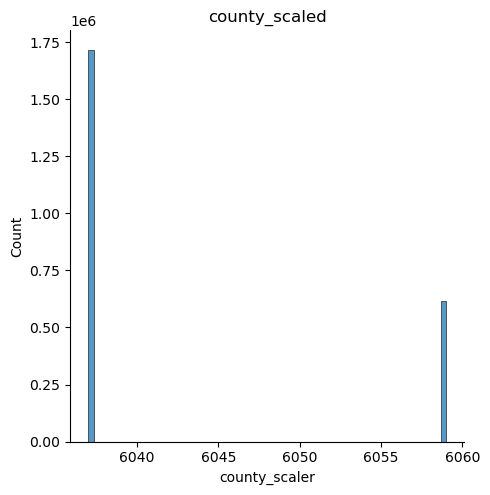

In [98]:
import seaborn as sns
sns.displot(x='county_scaler', data=df)

plt.title('county_scaled')
plt.show()

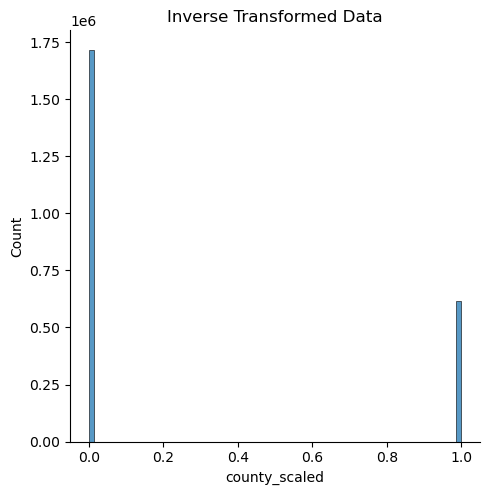

In [97]:
# Plot the inverse transformed data
sns.displot(data=df, x='county_scaled')
plt.title('Inverse Transformed Data')
plt.show()

In [ ]:
df = wrangle.wrangle_zillow_data()

In [18]:
df

num_bedrooms  num_bathrooms  total_sqft  assessed_property_value  \
10                4.0            4.0        3095                 192544.0   
30                2.0            2.0        1090                 357568.0   
33                3.0            2.0        2077                 646760.0   
45                4.0            2.0        1931                 224617.0   
46                0.0            1.0         700                 387288.0   
...               ...            ...         ...                      ...   
2982278           3.0            2.5        1648                 538640.0   
2982280           2.0            1.0         798                 469300.0   
2982281           3.0            3.0        1526                 594022.0   
2982282           4.0            4.0        2110                 554009.0   
2982283           1.0            1.0        1040                 620284.0   

         year_built  total_property_tax  county  county_scaled  
10             2016             2460.72    6037            0.0  
30             2004             6165.36    6037            0.0  
33             1926             7924.68    6037            0.0  
45             1957             2885.93    6037            0.0  
46             2008             4920.64    6037            0.0  
...             ...                 ...     ...            ...  
2982278        2014             6370.58    6059            1.0  
2982280        2006             5764.45    6037            0.0  
2982281        2014             7343.47    6037            0.0  
2982282        2014             6761.20    6037            0.0  
2982283        1910             7611.91    6037            0.0  

[2333865 rows x 8 columns]

In [ ]:
df = wrangle.remove_outliers_iqr(df, multiplier=1.5)

In [ ]:
df

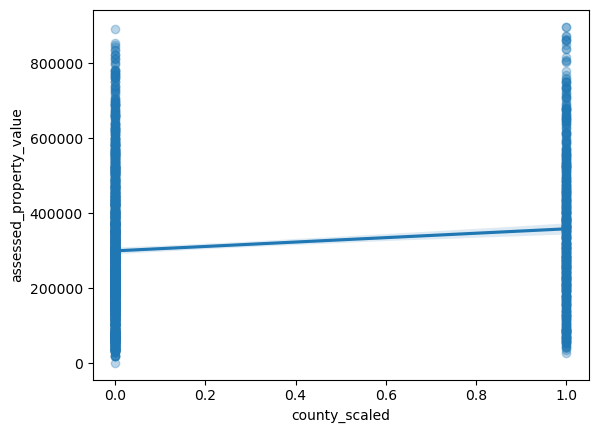

In [27]:
sample_df = df.sample(frac=0.001)  # Take a 10% random sample of the data
sns.regplot(data=sample_df, x='county_scaled', y='assessed_property_value', scatter_kws={'alpha': 0.3})
plt.show()

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


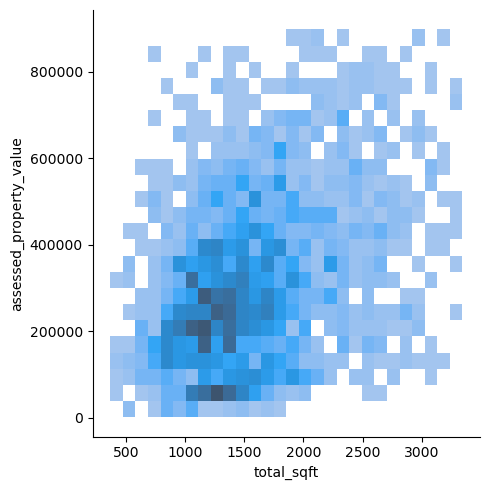

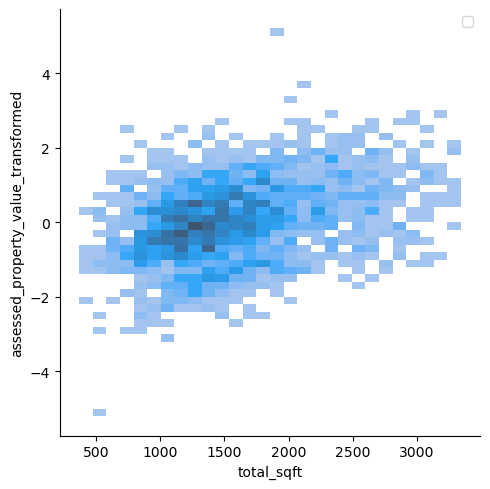

In [100]:
# Initialize the QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal')

# Fit the transformer and transform only the '' column
taxval_transformed = quantile_transformer.fit_transform(sample_df[['assessed_property_value']])

# Replace the original 'taxvaluedollarcnt' column with the transformed data
sample_df['assessed_property_value_transformed'] = taxval_transformed

# Visualize the original and transformed data
sns.displot(data=sample_df, x='total_sqft', y='assessed_property_value', label='Original')
sns.displot(data=sample_df, x='total_sqft', y='assessed_property_value_transformed', label='Transformed')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


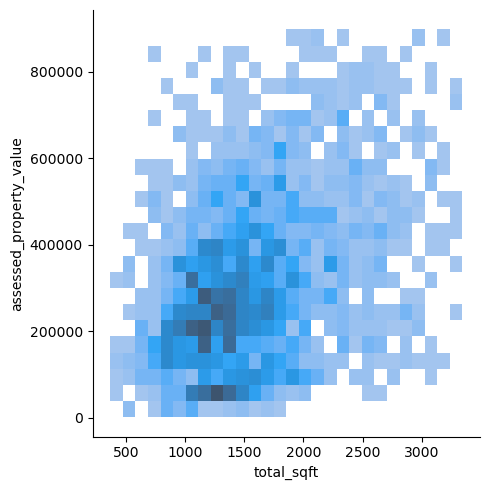

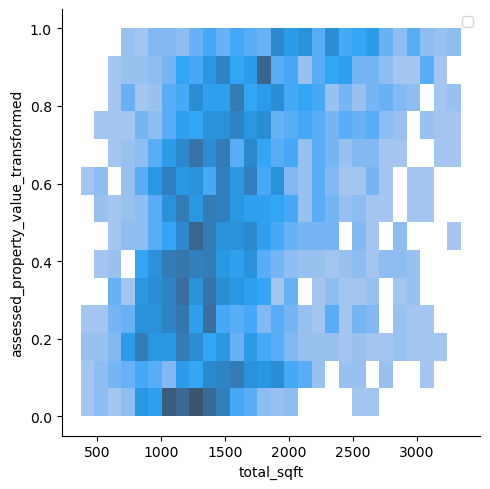

In [101]:
# Initialize the QuantileTransformer
quantile_transformer = QuantileTransformer()

# Fit the transformer and transform only the 'taxvaluedollarcnt' column
taxval_transformed = quantile_transformer.fit_transform(sample_df[['assessed_property_value']])

# Replace the original 'taxvaluedollarcnt' column with the transformed data
sample_df['assessed_property_value_transformed'] = taxval_transformed

# Visualize the original and transformed data
sns.displot(data=sample_df, x='total_sqft', y='assessed_property_value', label='Original')
sns.displot(data=sample_df, x='total_sqft', y='assessed_property_value_transformed', label='Transformed')
plt.legend()
plt.show()

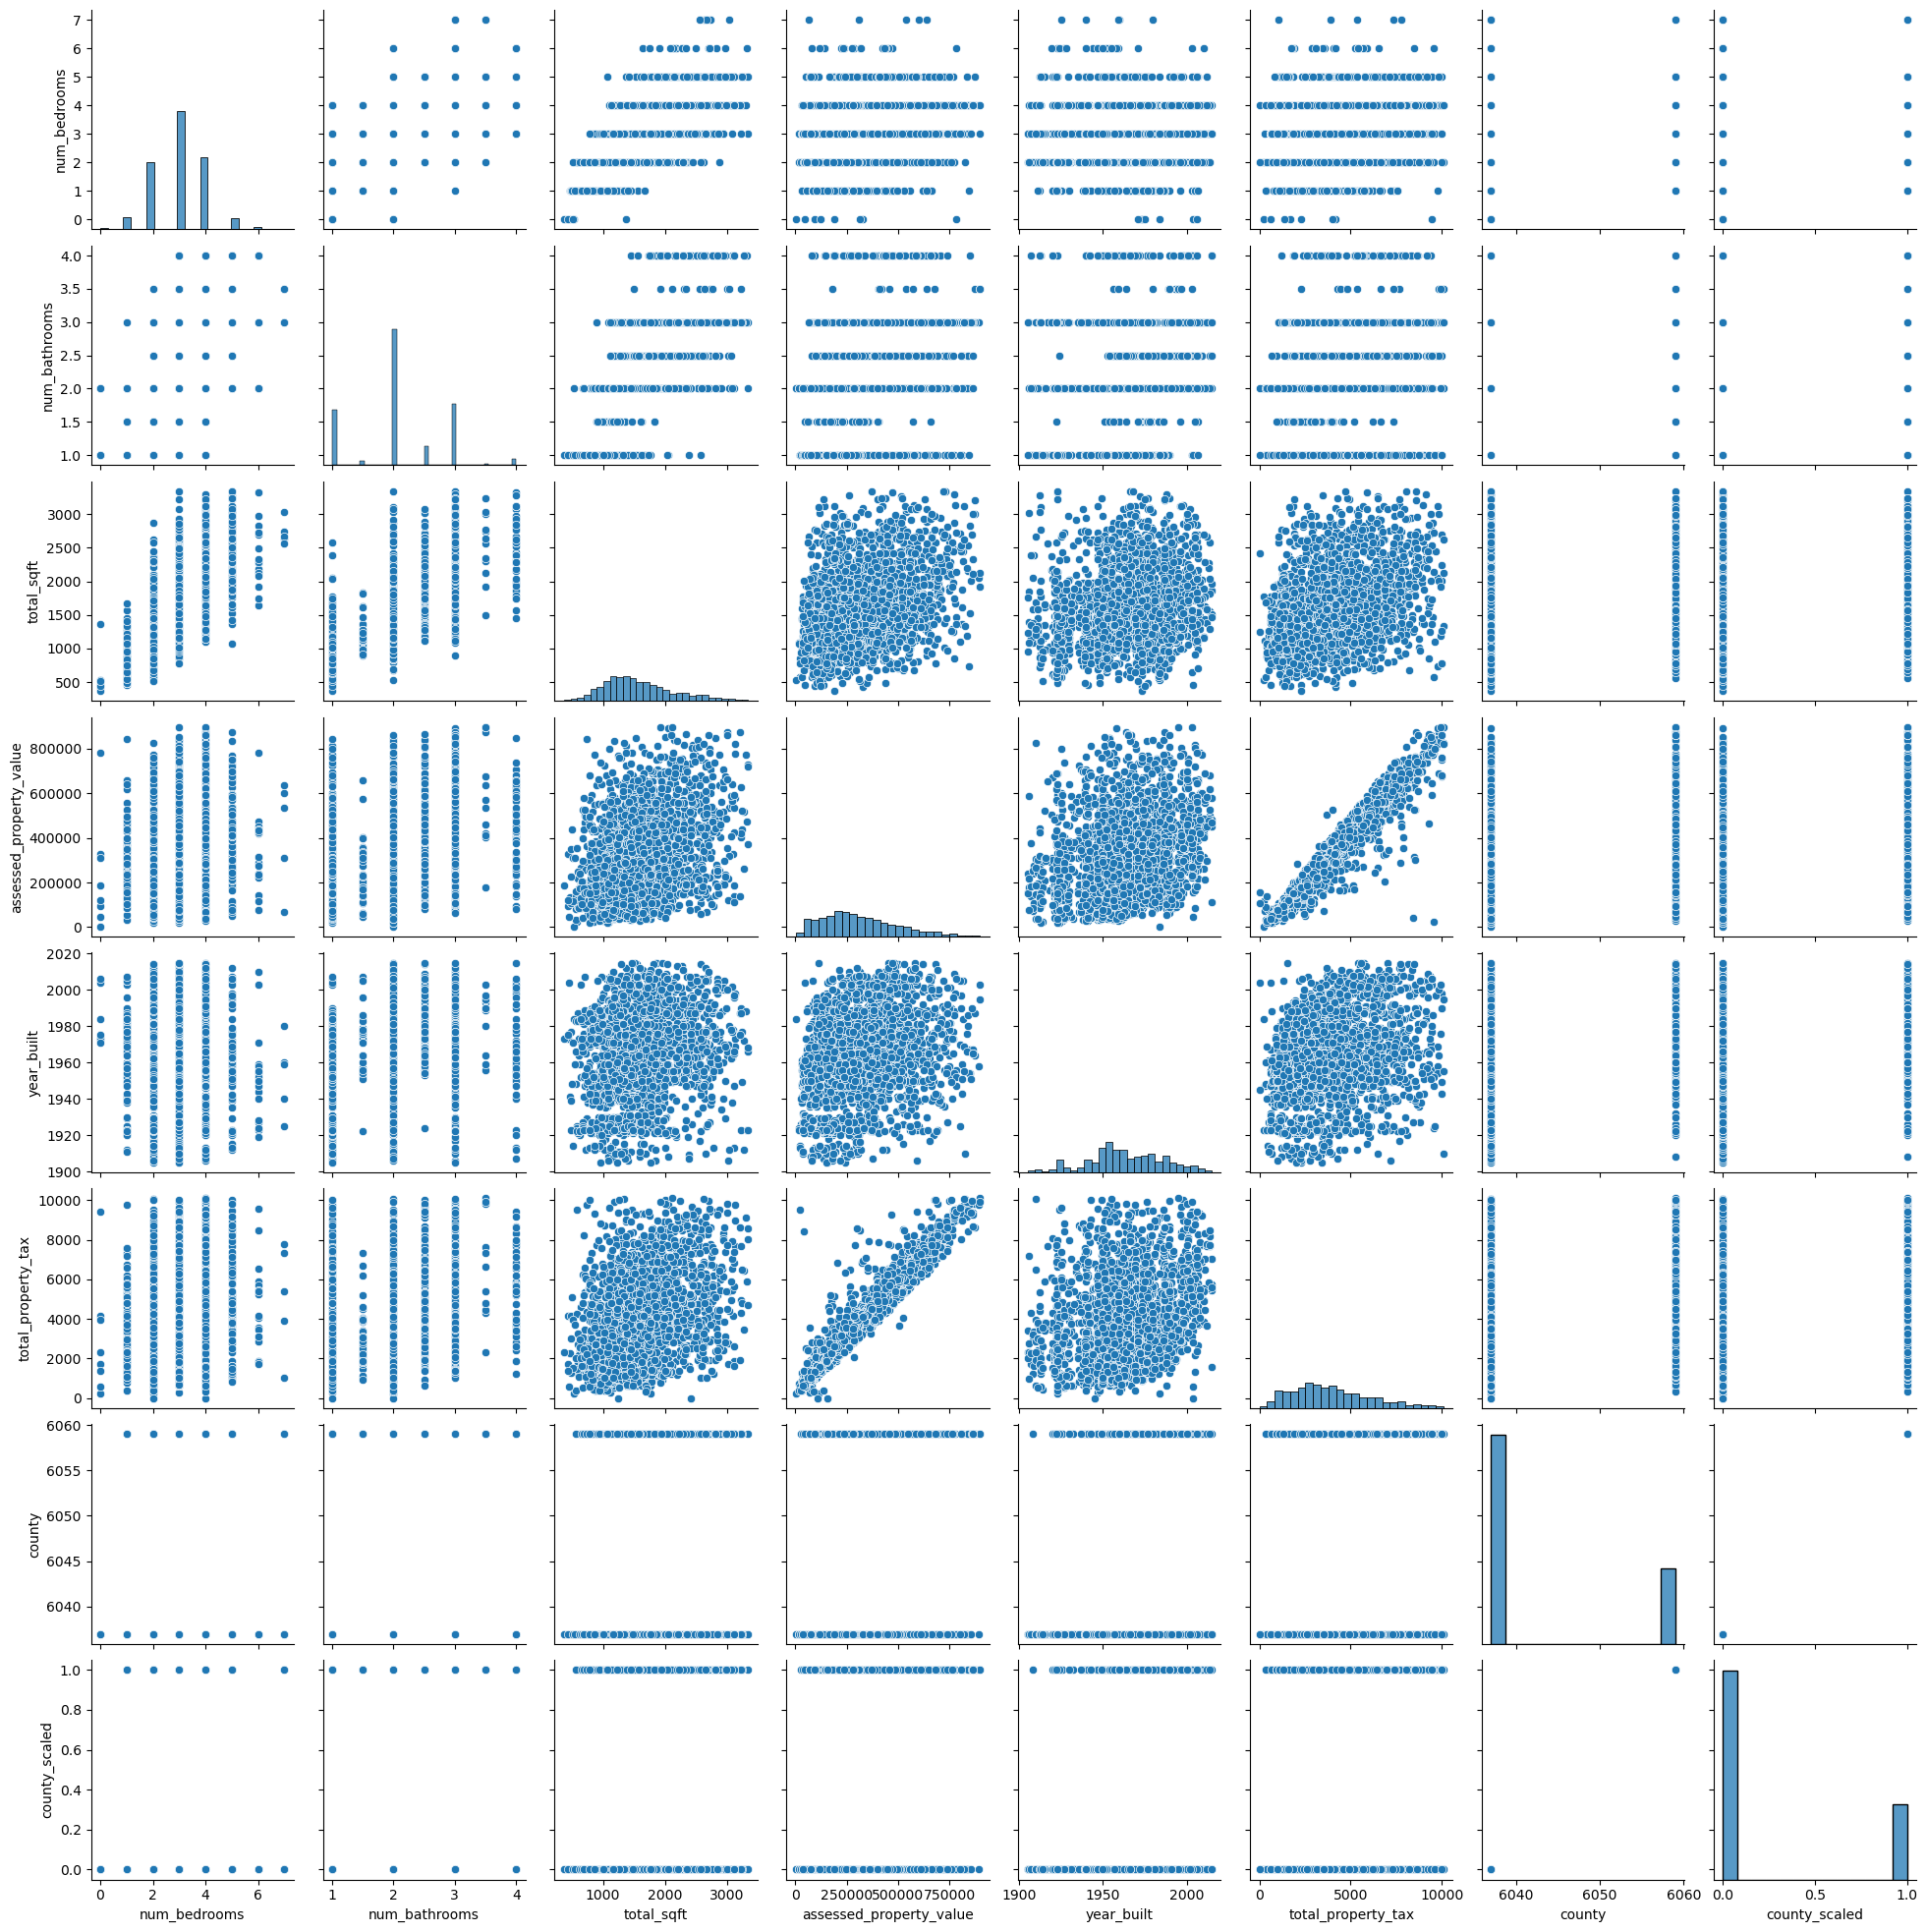

In [28]:
sns.pairplot(sample_df)
plt.show()

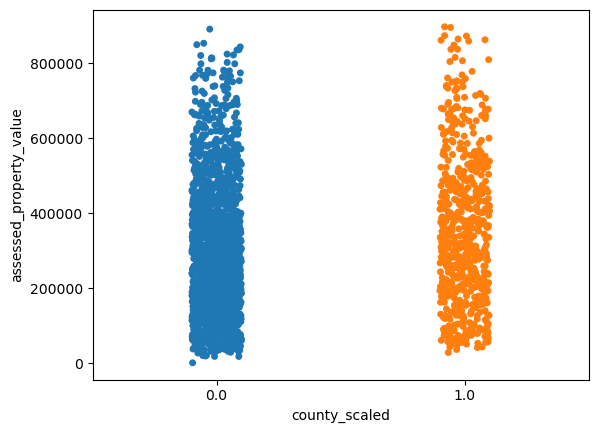

In [102]:
sns.stripplot(x='county_scaled', y='assessed_property_value', data=sample_df)
plt.show()

In [ ]:
df.info()

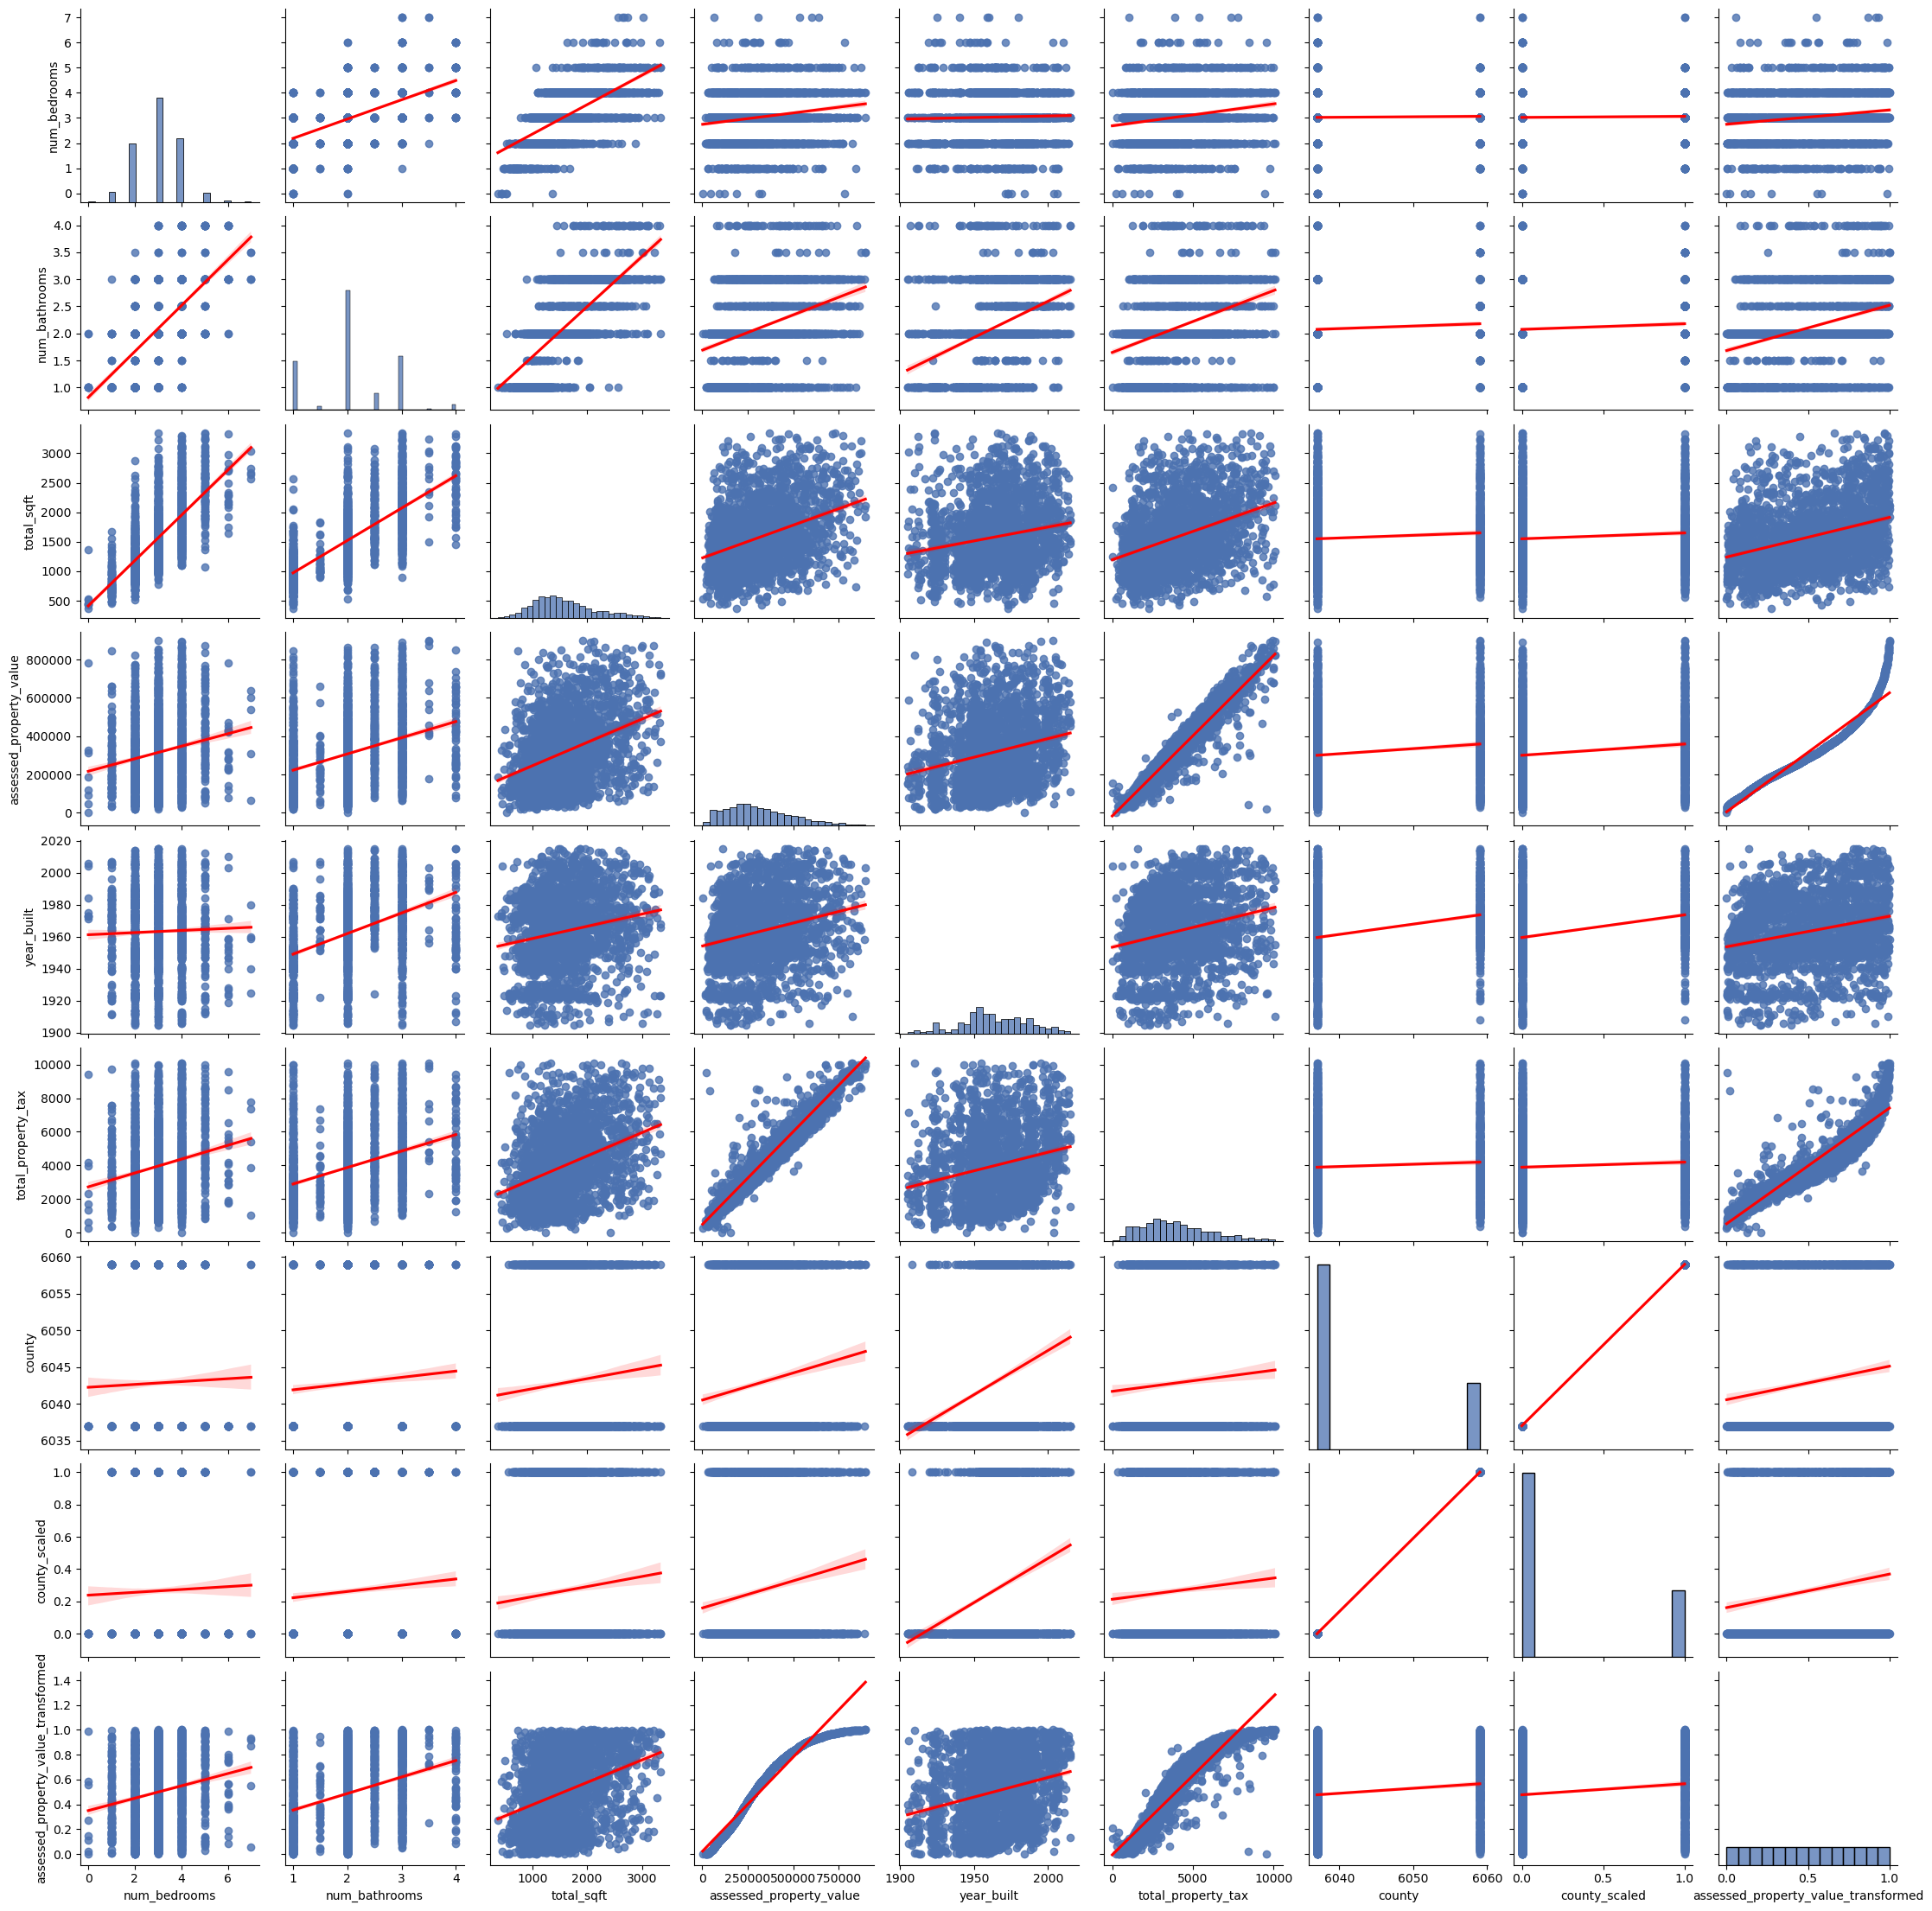

In [140]:
import seaborn as sns
import pandas as pd

def plot_variable_pairs(sample_df, columns=None):
    """
    This function takes a DataFrame as input and plots all pairwise relationships 
    along with the regression line for each pair of columns.
    
    Parameters
    ----------
    df : DataFrame
        The input DataFrame to plot pairwise relationships for.
    columns : list, optional
        A list of column names to plot. If not provided, all columns will be plotted.
    """
    if columns:
        df = sample_df[columns]
    
    # Create the pairplot with regression lines
    sns.pairplot(sample_df, kind='reg', plot_kws={'line_kws': {'color': 'red'}})
    
    
    # Example usage
columns_to_plot = ['total_sqft', 'year_built','num_bedrooms']
plot_variable_pairs(sample_df, columns_to_plot)
plt.show()


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split

def split_data(sample_df, test_size=0.2, random_state=None):
    """
    This function takes a DataFrame as input and returns train, validate, and test DataFrames.
    
    Parameters
    ----------
    df : DataFrame
        The input DataFrame to split.
    test_size : float, optional
        The proportion of the dataset to include in the test split. Default is 0.2.
    random_state : int, optional
        Controls the shuffling applied to the data before applying the split.
    """
    # First, split the data into train+validate and test sets
    train_validate, test = train_test_split(sample_df, test_size=test_size, random_state=random_state)
    
    # Next, split the train+validate set into train and validate sets
    train, validate = train_test_split(train_validate, test_size=test_size, random_state=random_state)
    
    return train, validate, test

In [55]:
split_data(sample_df, test_size=0.2, random_state=None)

(         num_bedrooms  num_bathrooms  total_sqft  assessed_property_value  \
 2782420           3.0            2.0        1739                 338238.0   
 2454327           2.0            2.0        1381                  68515.0   
 986677            3.0            2.0        1164                 315462.0   
 2876875           3.0            2.5        1787                 525000.0   
 550020            2.0            2.0         693                 281000.0   
 ...               ...            ...         ...                      ...   
 2558147           4.0            2.0        1228                 187957.0   
 2150026           3.0            2.0        1406                  75130.0   
 535285            2.0            2.0        1018                 465372.0   
 1448398           3.0            2.0        1888                 352083.0   
 311130            2.0            3.0        2452                 554679.0   
 
          year_built  total_property_tax  county  county_scale

In [56]:
# Split the data into train, validate, and test sets
train, validate, test = split_data(sample_df, test_size=0.2, random_state=42)

In [57]:
train

num_bedrooms  num_bathrooms  total_sqft  assessed_property_value  \
927171            2.0            2.0        1176                 235743.0   
1981886           2.0            2.0        1156                 590254.0   
1333863           2.0            1.0        1147                 319803.0   
861171            3.0            1.5        1621                  62798.0   
1883891           3.0            3.0        2659                 227770.0   
...               ...            ...         ...                      ...   
1108941           2.0            2.0        1078                 370058.0   
953955            0.0            2.0        1370                 782000.0   
1007207           3.0            2.0        2620                 206407.0   
2001171           3.0            2.0        1496                 396000.0   
2171559           4.0            3.0        2158                 365308.0   

         year_built  total_property_tax  county  county_scaled  
927171         1996             2891.55    6037            0.0  
1981886        1972             6349.24    6059            1.0  
1333863        1946             4015.72    6037            0.0  
861171         1955             1110.06    6059            1.0  
1883891        1968             2998.50    6037            0.0  
...             ...                 ...     ...            ...  
1108941        1987             4558.59    6037            0.0  
953955         2006             9438.76    6037            0.0  
1007207        1953             2634.73    6037            0.0  
2001171        1953             4881.42    6037            0.0  
2171559        1979             4701.85    6037            0.0  

[1493 rows x 8 columns]

In [58]:
validate

num_bedrooms  num_bathrooms  total_sqft  assessed_property_value  \
898939            2.0            1.0         855                 771590.0   
43877             4.0            3.0        2850                 251463.0   
2971690           2.0            2.0        1708                 590160.0   
223108            3.0            2.0        2100                 268000.0   
2365636           2.0            1.0         884                 203683.0   
...               ...            ...         ...                      ...   
2337123           4.0            3.0        1713                 653044.0   
647723            3.0            2.0        1176                 268273.0   
1407466           3.0            2.0        1302                 489590.0   
1624131           2.0            2.0         978                 153198.0   
2787482           3.0            3.0        2314                 504152.0   

         year_built  total_property_tax  county  county_scaled  
898939         1954             9310.22    6037            0.0  
43877          2004             4451.65    6037            0.0  
2971690        1981             7162.15    6037            0.0  
223108         2006             5652.90    6037            0.0  
2365636        1950             2674.18    6037            0.0  
...             ...                 ...     ...            ...  
2337123        1962             7432.90    6059            1.0  
647723         1954             3029.95    6037            0.0  
1407466        1962             5793.16    6037            0.0  
1624131        1973             1565.02    6059            1.0  
2787482        1982             3680.13    6037            0.0  

[374 rows x 8 columns]

In [59]:
test

num_bedrooms  num_bathrooms  total_sqft  assessed_property_value  \
1867338           4.0            2.0        1681                 212818.0   
2365457           4.0            2.0        1667                 288952.0   
1240719           4.0            3.0        2212                 544000.0   
1046209           3.0            2.0        1262                 509713.0   
1471561           4.0            2.0        1710                  76370.0   
...               ...            ...         ...                      ...   
753736            3.0            2.0        1679                 310724.0   
1154958           4.0            2.0        1982                 507933.0   
1698939           2.0            2.5        1250                 139514.0   
1859655           4.0            2.0        1252                 253666.0   
1646943           3.0            3.0        1380                 534813.0   

         year_built  total_property_tax  county  county_scaled  
1867338        1957             2687.53    6037            0.0  
2365457        1954             3530.70    6037            0.0  
1240719        1989             7574.79    6037            0.0  
1046209        1953             6139.21    6037            0.0  
1471561        1961              482.22    6037            0.0  
...             ...                 ...     ...            ...  
753736         1964             4349.72    6037            0.0  
1154958        1941             6900.75    6037            0.0  
1698939        1989             1897.56    6059            1.0  
1859655        1955             3225.57    6037            0.0  
1646943        1995             6266.66    6037            0.0  

[467 rows x 8 columns]

In [60]:
# Use the plot_variable_pairs function on the train set
columns_to_plot = ['total_sqft', 'year_built']
plot_variable_pairs(train, columns_to_plot)

In [61]:
def is_continuous(series, unique_count_threshold=100):
    return (series.dtype in ['int64', 'float64']) and (series.nunique() > unique_count_threshold)

def is_categorical(series, unique_count_threshold=10):
    return (series.dtype == 'object') or (series.nunique() <= unique_count_threshold)

In [67]:
summarize_data(df)

column_name   dtypes  missing_values  unique_values    count  \
0             num_bedrooms  float64               0              8  2333865   
1            num_bathrooms  float64               0             10  2333865   
2               total_sqft    int64               0           3161  2333865   
3  assessed_property_value  float64               0         473602  2333865   
4               year_built    int64               0            112  2333865   
5       total_property_tax  float64               0         761704  2333865   
6                   county    int64               0              2  2333865   
7            county_scaled  float64               0              2  2333865   

            mean            std     min        25%       50%        75%  \
0       3.051643       0.966603     0.0       2.00       3.0       4.00   
1       2.103261       0.737799     0.5       2.00       2.0       3.00   
2    1584.051947     564.776968     1.0    1170.00    1484.0    1909.00   
3  322066.757906  190492.692147     0.0  176039.00  291445.0  440101.00   
4    1962.456885      22.436972  1905.0    1950.00    1961.0    1979.00   
5    4029.068318    2186.006180     0.0    2366.09    3699.3    5403.64   
6    6042.816141       9.701940  6037.0    6037.00    6037.0    6059.00   
7       0.264370       0.440997     0.0       0.00       0.0       1.00   

         max  
0       7.00  
1       4.50  
2    3345.00  
3  914925.00  
4    2016.00  
5   10141.73  
6    6059.00  
7       1.00

In [66]:
is_continuous(train['assessed_property_value'], unique_count_threshold=10)

True

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_and_continuous_vars(train, continuous_var, categorical_var):
    """
    This function takes a DataFrame, a continuous variable, and a categorical variable as input,
    and outputs three plots for visualizing the relationship between the continuous and
    categorical variables: a boxplot, a violin plot, and a swarm plot.

    Parameters
    ----------
    df : DataFrame
        The input DataFrame to plot.
    continuous_var : str
        The name of the continuous variable column.
    categorical_var : str
        The name of the categorical variable column.
    """
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))

    sns.boxplot(data=train, x=categorical_var, y=continuous_var, ax=axes[0])
    axes[0].set_title(f'Boxplot of {continuous_var} by {categorical_var}')

    sns.violinplot(data=train, x=categorical_var, y=continuous_var, ax=axes[1])
    axes[1].set_title(f'Violin plot of {continuous_var} by {categorical_var}')

    sns.swarmplot(data=train, x=categorical_var, y=continuous_var, ax=axes[2])
    axes[2].set_title(f'Swarm plot of {continuous_var} by {categorical_var}')

    plt.tight_layout()
    plt.show()

/Users/tux/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tux/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 48.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tux/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


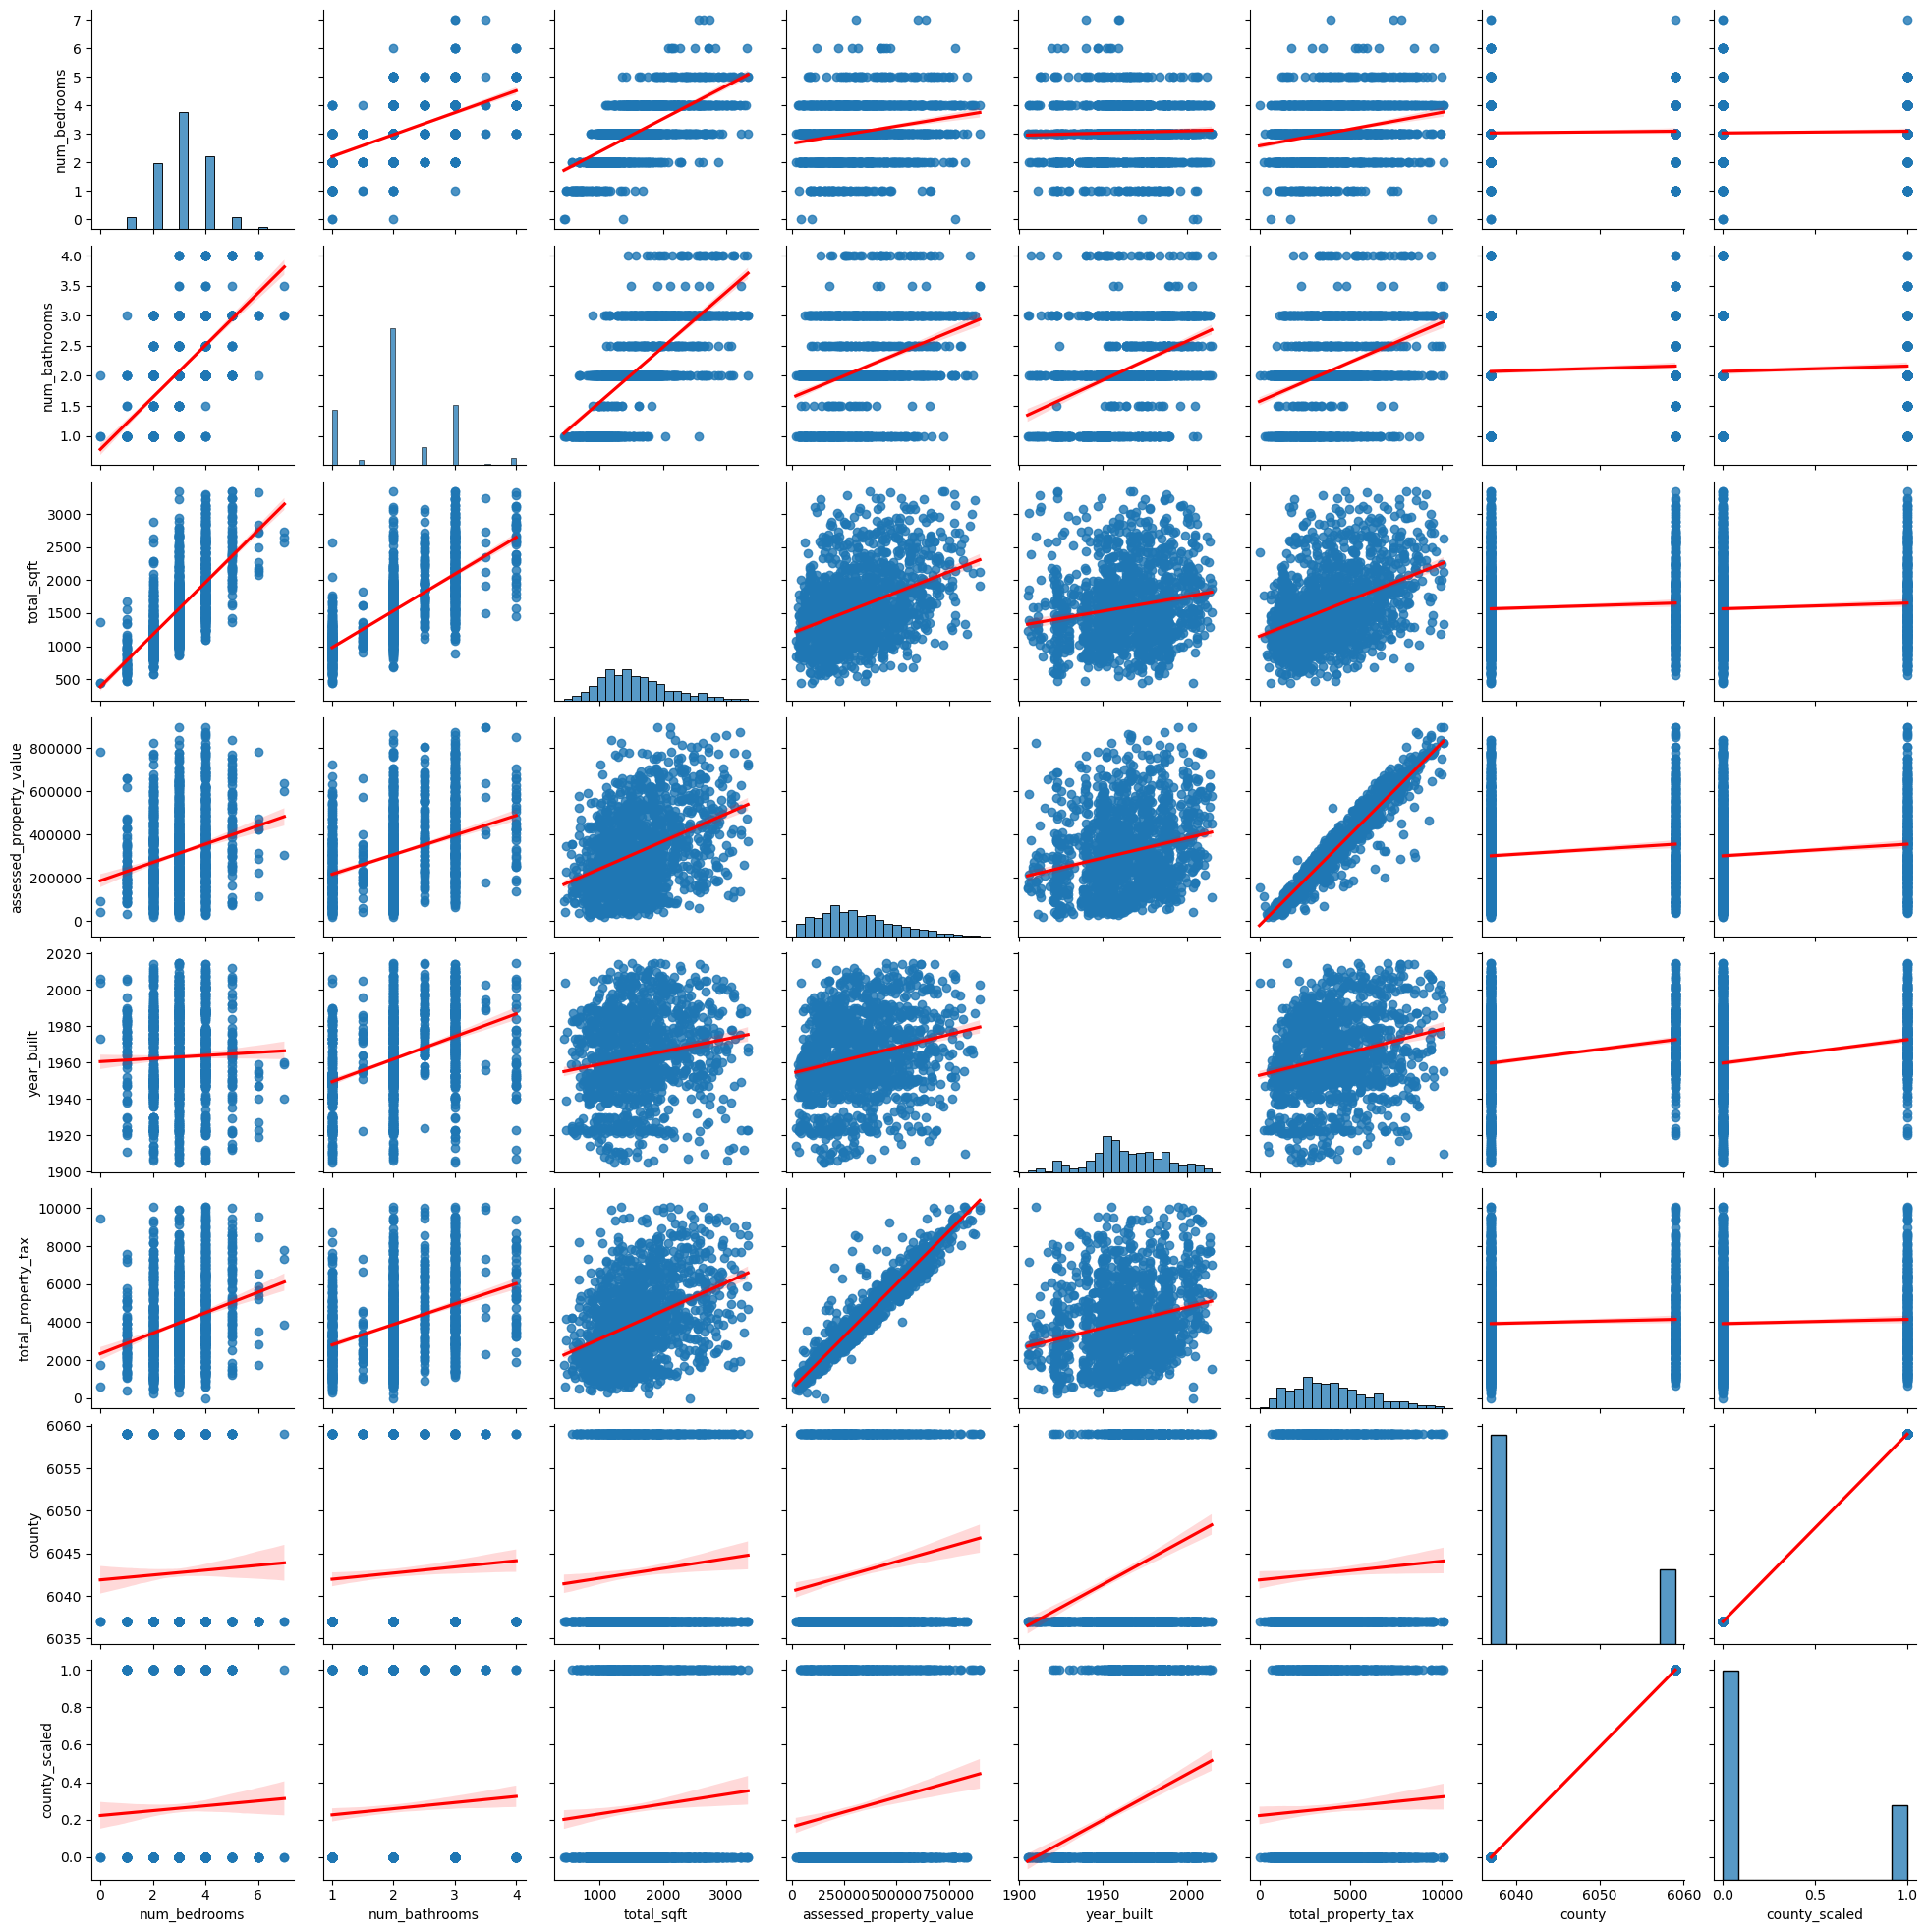

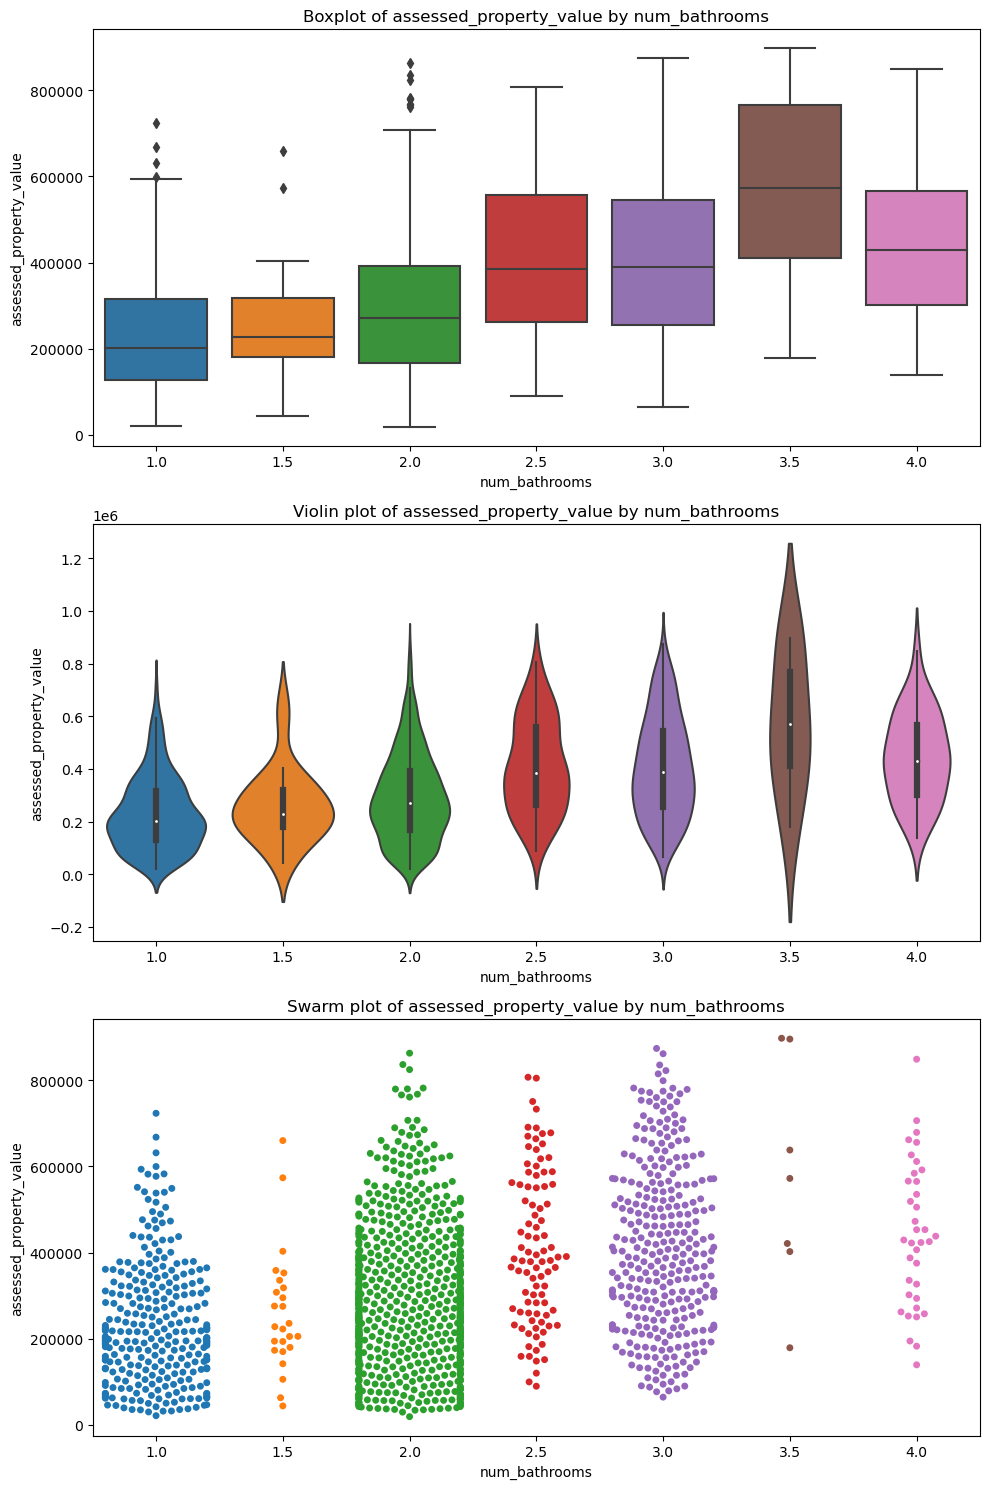

In [68]:
plot_categorical_and_continuous_vars(train, 'assessed_property_value', 'num_bathrooms')

/Users/tux/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tux/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 59.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tux/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 30.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


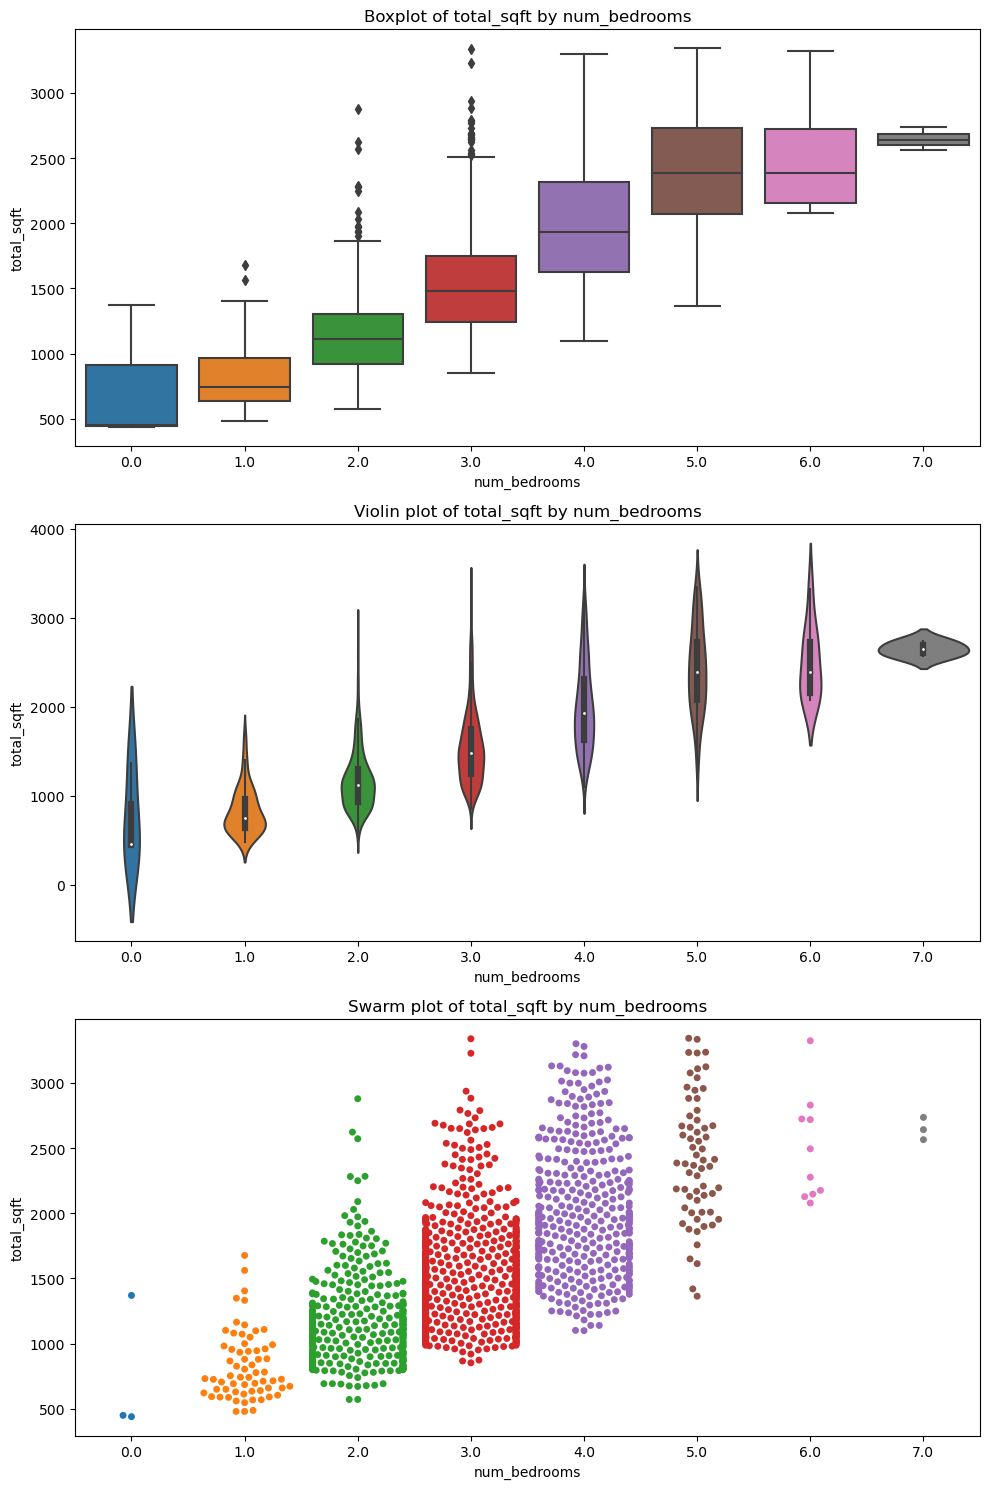

In [69]:
#
continuous_var = 'total_sqft'
categorical_var = 'num_bedrooms'
plot_categorical_and_continuous_vars(train, continuous_var, categorical_var)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_and_continuous_vars(train_validate, continuous_var, categorical_var):
    """
    This function takes a DataFrame, a continuous variable, and a categorical variable as input,
    and outputs three plots for visualizing the relationship between the continuous and
    categorical variables: a boxplot, a violin plot, and a strip plot.

    Parameters
    ----------
    df : DataFrame
        The input DataFrame to plot.
    continuous_var : str
        The name of the continuous variable column.
    categorical_var : str
        The name of the categorical variable column.
    """
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))

    sns.boxplot(data=train, x=categorical_var, y=continuous_var, ax=axes[0])
    axes[0].set_title(f'Boxplot of {continuous_var} by {categorical_var}')

    sns.violinplot(data=train, x=categorical_var, y=continuous_var, ax=axes[1])
    axes[1].set_title(f'Violin plot of {continuous_var} by {categorical_var}')

    # Use stripplot and set the marker size to a smaller value
    sns.stripplot(data=train, x=categorical_var, y=continuous_var, ax=axes[2], size=2)
    axes[2].set_title(f'Strip plot of {continuous_var} by {categorical_var}')

    plt.tight_layout()
    plt.show()

/Users/tux/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


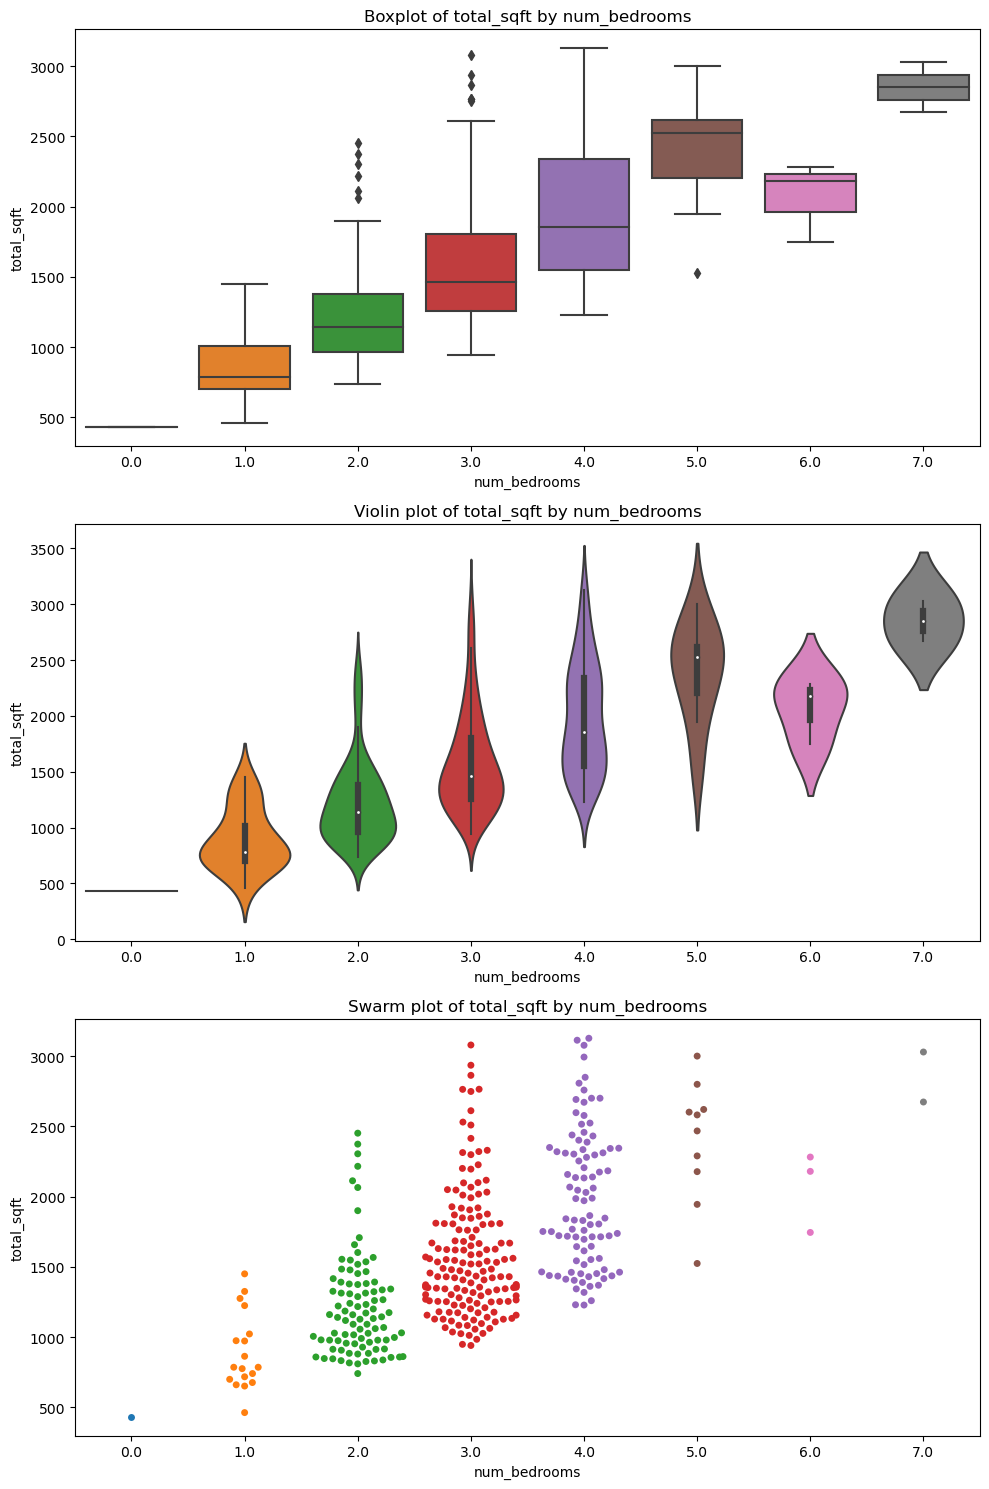

In [70]:
# Example usage
continuous_var = 'total_sqft'
categorical_var = 'num_bedrooms'
plot_categorical_and_continuous_vars(validate, continuous_var, categorical_var)

In [ ]:
sample_df = df.sample(frac=0.1)  # Take a 10% random sample of the data

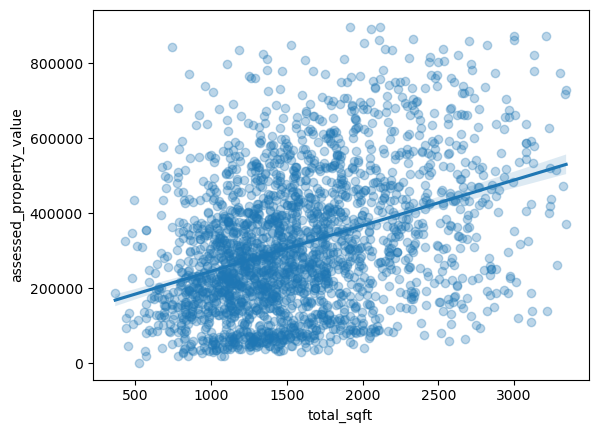

In [108]:
sns.regplot(data=sample_df, x='total_sqft', y='assessed_property_value', scatter_kws={'alpha': 0.3});
plt.show()

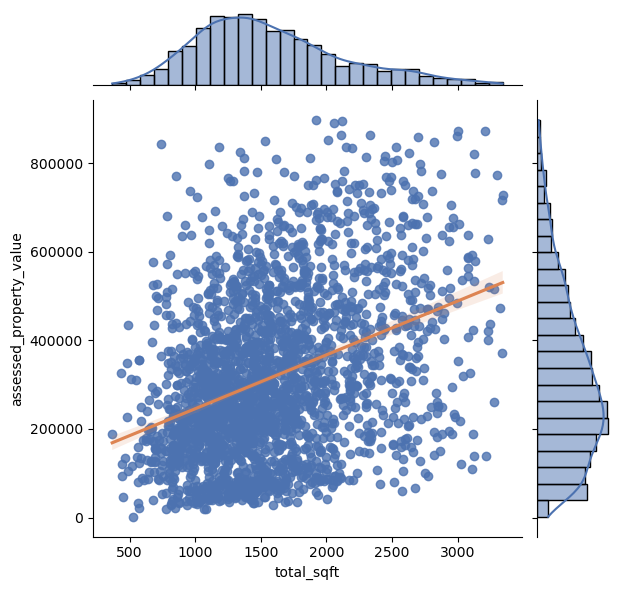

In [138]:
sns.jointplot(data=sample_df, x='total_sqft', y='assessed_property_value', line_kws={"color": "C1"}, kind='reg')
plt.show()

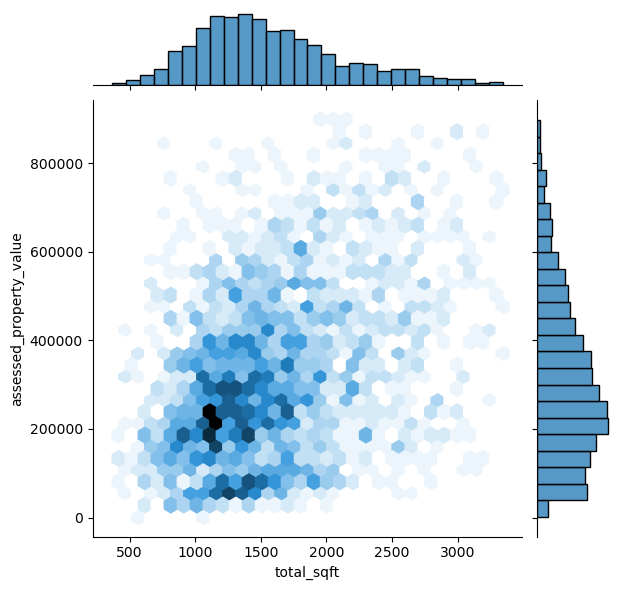

In [106]:
sns.jointplot(data=sample_df, x='total_sqft', y='assessed_property_value', kind='hex', gridsize=30)
plt.show()

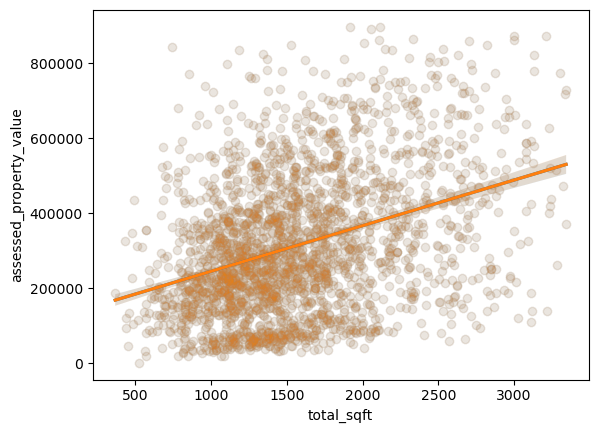

In [79]:
sns.regplot(data=sample_df, x='total_sqft', y='assessed_property_value', scatter_kws={'alpha': 0.1})
plt.show()

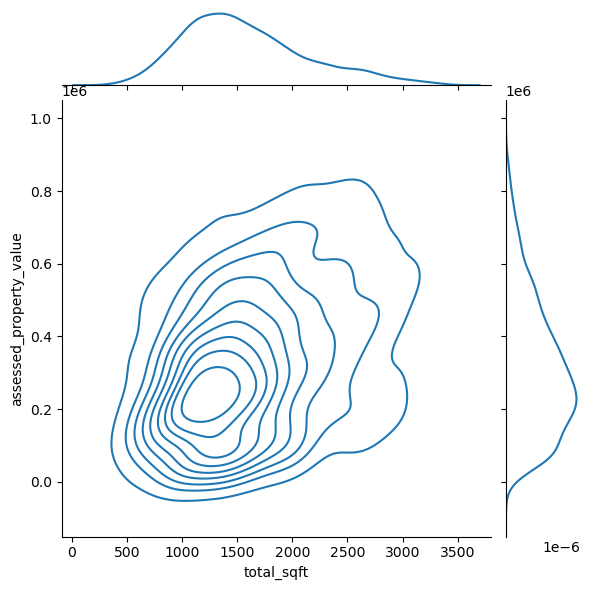

In [113]:
sns.jointplot(data=sample_df, x='total_sqft', y='assessed_property_value', kind='kde')
plt.show()

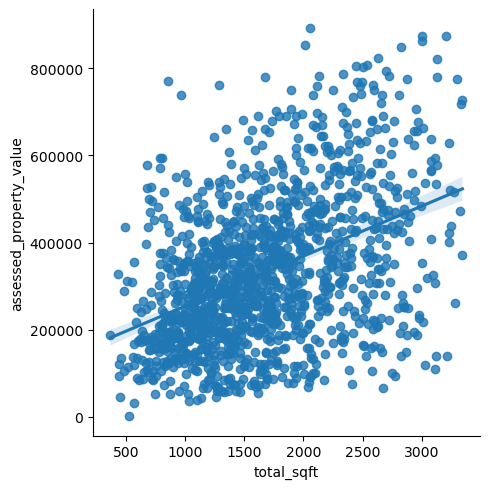

In [126]:
grouped_df = sample_df.groupby('total_sqft').agg({'assessed_property_value': 'mean'}).reset_index()
sns.lmplot(data=grouped_df, x='total_sqft', y='assessed_property_value')
sns.set_palette('deep')
plt.show()

> Hypothesis 1:

> Null Hypothesis (H0): There is no significant difference in the number of bedrooms between houses in County 1 and County 2.
Alternative Hypothesis (H1): There is a significant difference in the number of bedrooms between houses in County 1 and County 2.

> Hypothesis 2:

>Null Hypothesis (H0): The total square footage of a house is not correlated with its assessed property value.
Alternative Hypothesis (H1): The total square footage of a house is correlated with its assessed property value.


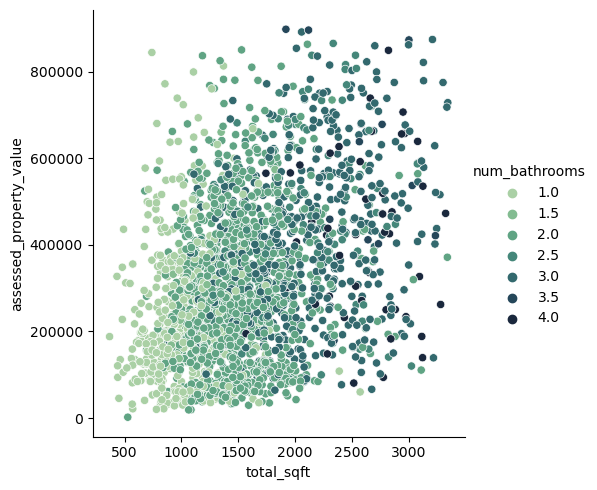

In [133]:
sns.relplot(data=sample_df, x="total_sqft", y="assessed_property_value", hue="num_bathrooms", palette="ch:r=-.5,l=.75")
plt.show()

We fail to reject the null hypothesis. There is no significant difference in the number of bedrooms between houses in County 1 and County 2.
We reject the null hypothesis. The total square footage of a house is correlated with its assessed property value.


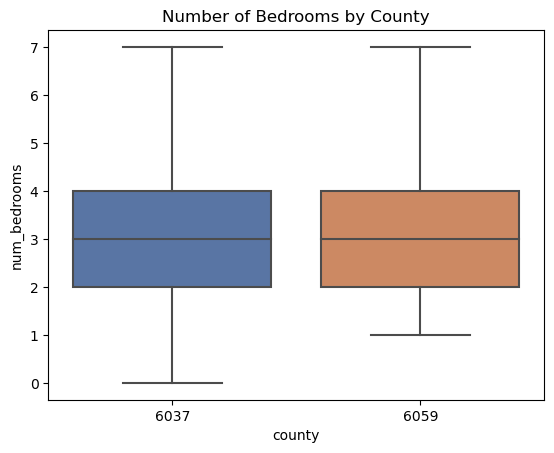

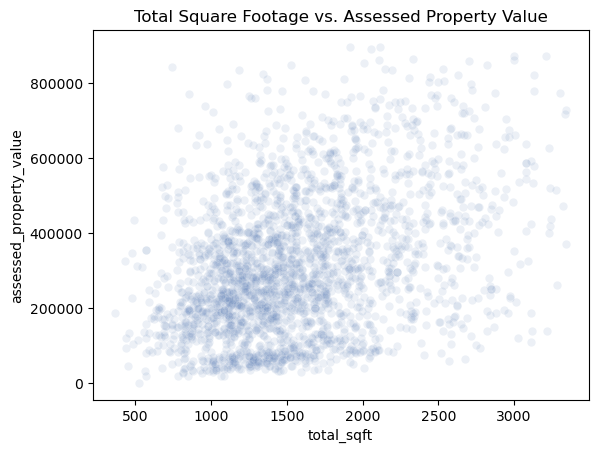

In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, pearsonr, spearmanr


county1 = sample_df[sample_df['county'] == 1]['num_bedrooms']
county2 = sample_df[sample_df['county'] == 2]['num_bedrooms']

# Hypothesis 1: Independent two-sample t-test
t_stat, p_value = ttest_ind(county1, county2)

alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference in the number of bedrooms between houses in County 1 and County 2.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in the number of bedrooms between houses in County 1 and County 2.")

# Hypothesis 2: Pearson correlation test
correlation, p_value = pearsonr(sample_df['total_sqft'], sample_df['assessed_property_value'])

if p_value < alpha:
    print("We reject the null hypothesis. The total square footage of a house is correlated with its assessed property value.")
else:
    print("We fail to reject the null hypothesis. The total square footage of a house is not correlated with its assessed property value.")

# Visualizations
# Hypothesis 1: Boxplot for the number of bedrooms in each county
sns.boxplot(data=sample_df, x='county', y='num_bedrooms')
plt.title('Number of Bedrooms by County')
plt.show()

# Hypothesis 2: Scatter plot for total square footage vs. assessed property value
sns.scatterplot(data=sample_df, x='total_sqft', y='assessed_property_value', alpha=0.1)
plt.title('Total Square Footage vs. Assessed Property Value')
plt.show()

In [151]:
p_value

1.257288581668856e-75

In [152]:
correlation

0.3676853536745183

In [139]:
train.columns

Index(['num_bedrooms', 'num_bathrooms', 'total_sqft',
       'assessed_property_value', 'year_built', 'total_property_tax', 'county',
       'county_scaled'],
      dtype='object')

> scale columns omitting the target!

In [142]:
correlation_matrix = df.corr()

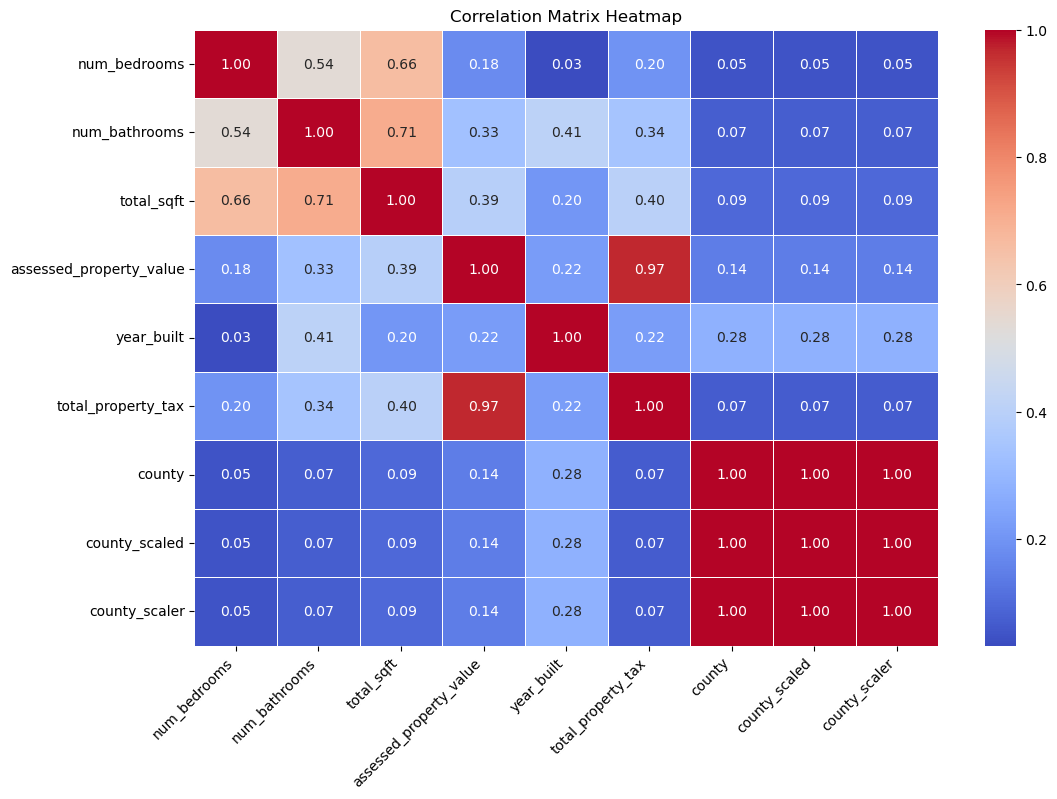

In [146]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# Customize the plot
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
# Show the plot
plt.show()